<a href="https://colab.research.google.com/github/thuhuong205201/Data_preparing/blob/main/Hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA dữ liệu, xử lý dữ liệu dạng text, category, xử lý outlierm chạy thuật toán LR, KNN (tune tham số k), SVM (tune tham số kernel, C) cho dữ liệu:
1. https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

In [6]:
wine = pd.read_csv("/content/drive/MyDrive/datapreparing/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


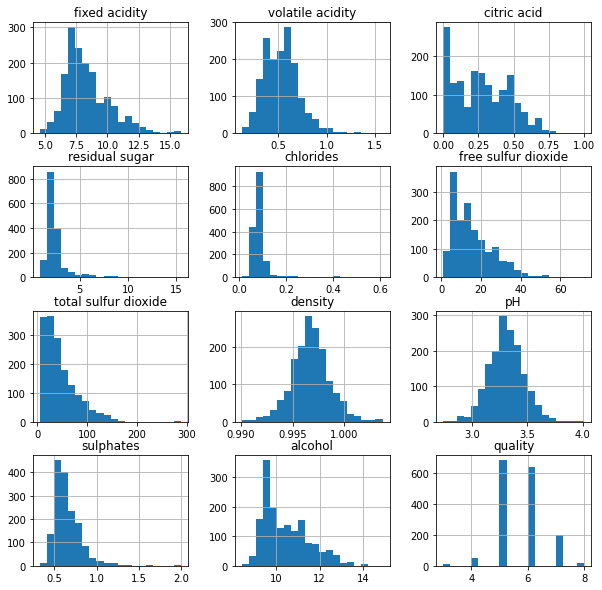

In [13]:
wine.hist(bins = 20, figsize= (10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


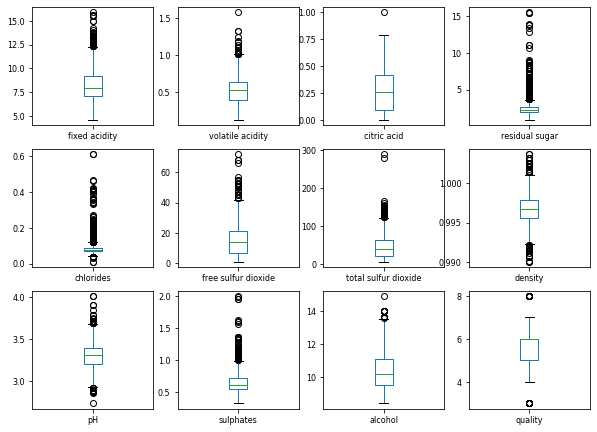

In [15]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
wine.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

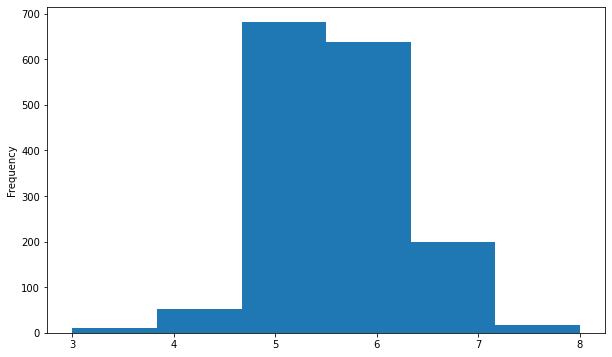

In [16]:
fig = plt.figure(figsize = (10,6))
wine['quality'].plot(kind='hist', bins=6)

In [ ]:
#Remove outlier
for col in wine.columns:
  q75, q25 = np.percentile(wine[col], [75 ,25])
  iqr = q75 - q25
  wine=wine[wine[col].between(q25-1.5*iqr, q75+1.5*iqr)]
wine

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


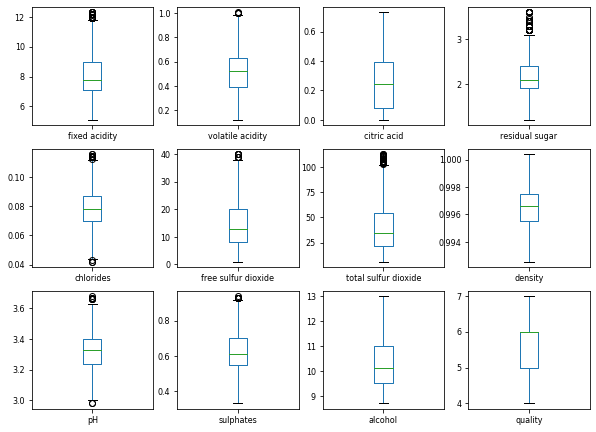

In [19]:
# after remover outlier
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
wine.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

Linear Regression

In [22]:
x_train, x_test, y_train, y_test=train_test_split(wine.drop(columns='quality'), 
                                                  wine['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md_wine=LinearRegression()
md_wine.fit(x_train, y_train)
prediction=md_wine.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.4107464531699556
MSE score: 0.29135442782308474
Accuracy score: 0.6512455516014235


In [29]:
#SVR with GridSearchCV
scaler= StandardScaler()
scaled_data=scaler.fit_transform(wine.drop(columns='quality'))

x_train, x_test, y_train, y_test=train_test_split(scaled_data, wine['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(x_train, y_train)

prediction=clf.best_estimator_.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.22988064136058606
MSE score: 0.3807829181494662
Accuracy score: 0.6512455516014235


In [36]:
#KNN
scaler= StandardScaler()
scaled_data=scaler.fit_transform(wine.drop(columns='quality'))

x_train, x_test, y_train, y_test=train_test_split(scaled_data, wine['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md_wine=KNeighborsRegressor()
md_wine.fit(x_train, y_train)
prediction=md_wine.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.3315076071922546
MSE score: 0.33053380782918146
Accuracy score: 0.604982206405694


In [5]:
car = pd.read_csv("/content/drive/MyDrive/datapreparing/CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

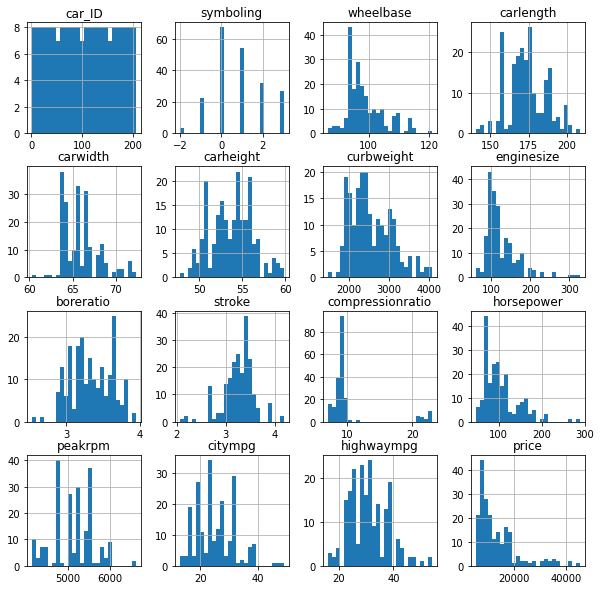

In [44]:
car.hist(bins = 26, figsize= (10,10))
plt.show()

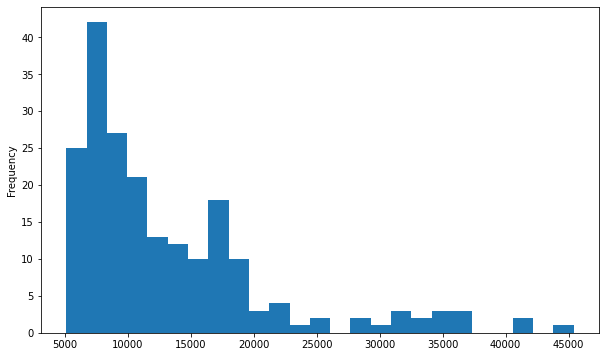

In [54]:
fig = plt.figure(figsize = (10,6))
car['price'].plot(kind='hist', bins=25)

In [53]:
car['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


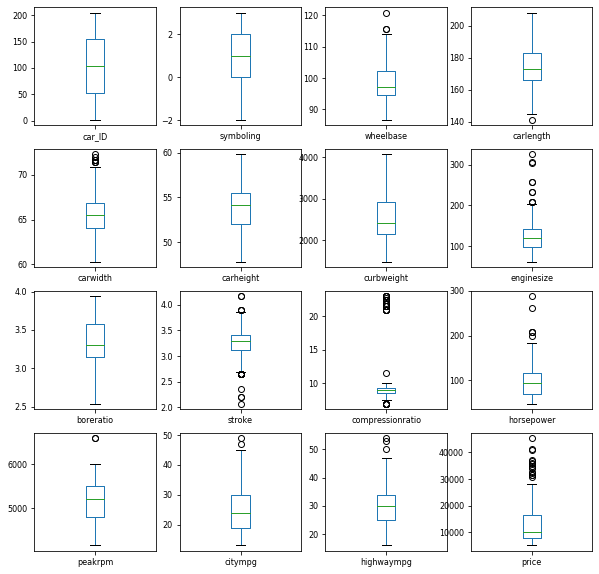

In [49]:
# after remover outlier
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
car.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()